# Building NARX models using general estimators

Example created by Wilson Rocha Lacerda Junior

In this example we will create NARX models using different estimator like GrandientBoostingRegressior, Bayesian Regression, Automatic Relevance Determination (ARD) Regression and Catboost

In [ ]:
pip install sysidentpy

In [1]:
import matplotlib.pyplot as plt
from sysidentpy.metrics import mean_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.general_estimators import NARX
from sklearn.linear_model import BayesianRidge, ARDRegression
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

10-14 20:29:33 - INFO - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
10-14 20:29:33 - INFO - NumExpr defaulting to 8 threads.


In [2]:
# simulated dataset
x_train, x_valid, y_train, y_valid = get_siso_data(n=10000,
                                                   colored_noise=False,
                                                   sigma=0.01,
                                                   train_percentage=80)

## Importance of the NARX architecture

To get an idea of the importance of the NARX architecture, lets take a look in the performance of the models without the NARX configuration.

In [3]:
catboost = CatBoostRegressor(iterations=300,
                             learning_rate=0.1,
                             depth=6)

In [4]:
gb = GradientBoostingRegressor(loss='quantile', alpha=0.90,
                                n_estimators=250, max_depth=10,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

In [5]:
def plot_results(yvalid, yhat):
    _, ax = plt.subplots(figsize=(14, 8))
    ax.plot(y_valid[:200], label='Data', marker='o')
    ax.plot(yhat[:200], label='Prediction', marker='*')
    ax.set_xlabel("$n$", fontsize=18)
    ax.set_ylabel("$y[n]$", fontsize=18)
    ax.grid()
    ax.legend(fontsize=18)
    plt.show()

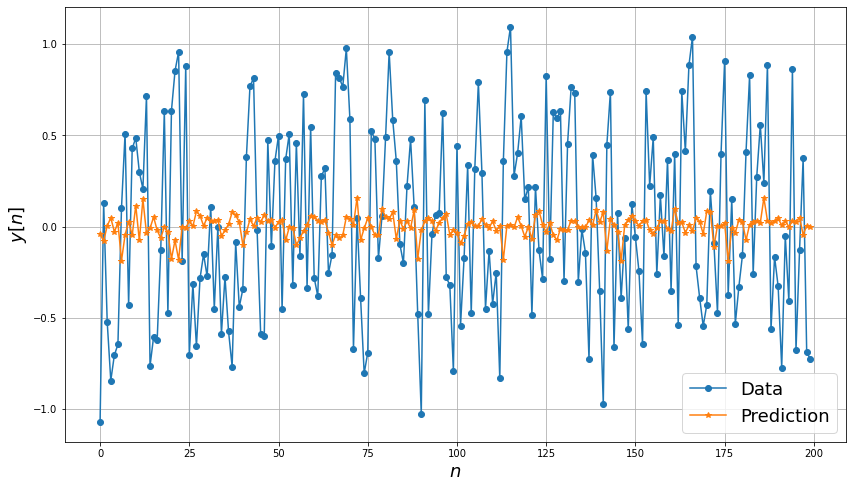

In [6]:
catboost.fit(x_train, y_train, verbose=False)

plot_results(y_valid, catboost.predict(x_valid))

C:\Users\wilso\miniconda3\envs\rd\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


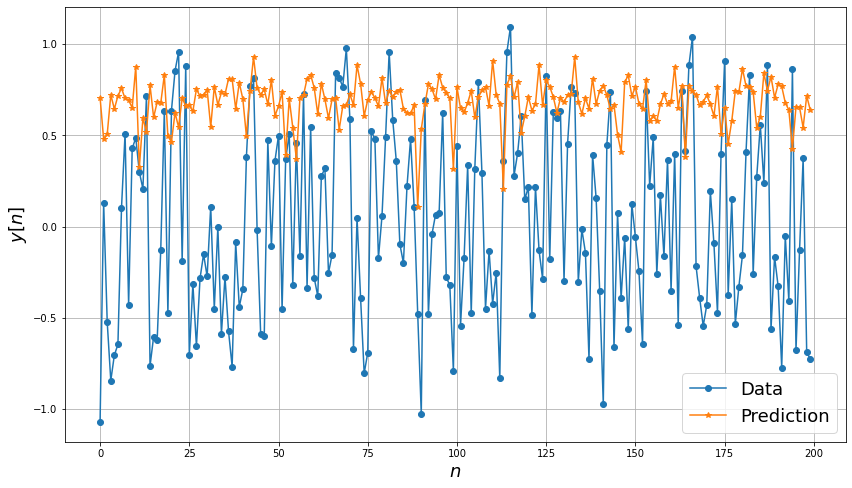

In [7]:
gb.fit(x_train, y_train)

plot_results(y_valid, gb.predict(x_valid))

## Introducing the NARX configuration using SysIdentPy

As you can see, you just need to pass the base estimator you want to the NARX class from SysIdentPy do build the NARX model! You can choose the lags of the input and output variables to build the regressor matrix.

 We keep the fit/predict method to make the process straightforward.

### NARX with Catboost

10-14 20:29:57 - INFO - Training the model
10-14 20:29:57 - INFO - Creating the regressor matrix
10-14 20:29:57 - INFO - The regressor matrix have 5 features


c:\Users\wilso\Desktop\projects\GitHub\sysidentpy\sysidentpy\utils\deprecation.py:27: FutureWarning: Function __init__ has been deprecated since v0.1.7.
 Use NARXNN(ylag=2, xlag=2, basis_function='Some basis function') instead.This module was deprecated in favor of NARXNN(ylag=2, xlag=2, basis_function='Some basis function') module into which all the refactored classes and functions are moved.
 This feature will be removed in version v0.2.0.
  warnings.warn(message, FutureWarning)


10-14 20:29:57 - INFO - Done! Model is built!
0.00015757931892613298


c:\Users\wilso\Desktop\projects\GitHub\sysidentpy\sysidentpy\utils\deprecation.py:27: FutureWarning: Function residuals has been deprecated since v0.1.7.
 Use from sysidentpy.residues_correlation import compute_cross_correlation, compute_residues_autocorrelation instead.This module was deprecated in favor of from sysidentpy.residues_correlation import compute_cross_correlation, compute_residues_autocorrelation module into which all the refactored classes and functions are moved.
 This feature will be removed in version v0.2.0.
  warnings.warn(message, FutureWarning)


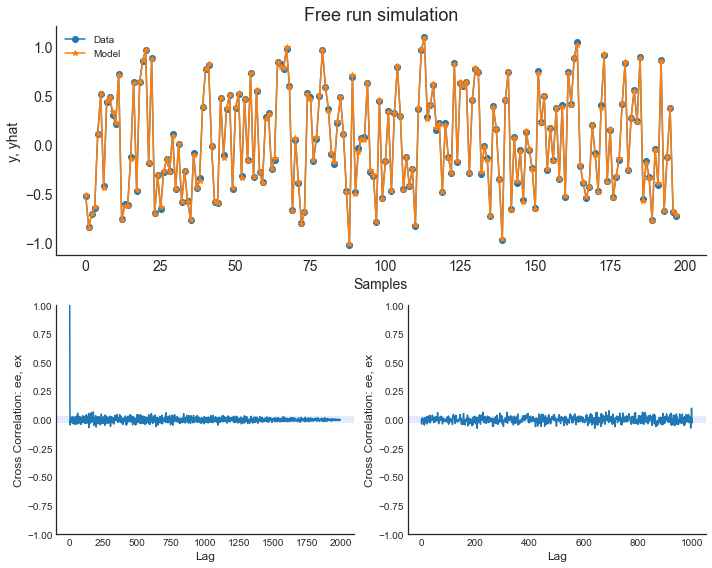

In [8]:
from sysidentpy.general_estimators import NARX

catboost_narx = NARX(base_estimator=CatBoostRegressor(iterations=300,
                                                      learning_rate=0.1,
                                                      depth=6),
                     xlag=2,
                     ylag=2,
                     fit_params={'verbose': False}
)

catboost_narx.fit(x_train, y_train)
yhat = catboost_narx.predict(x_valid, y_valid)
print(mean_squared_error(y_valid, yhat))

ee, ex, extras, lam = catboost_narx.residuals(x_valid, y_valid, yhat)
catboost_narx.plot_result(y_valid, yhat, ee, ex, n=200)

### NARX with Gradient Boosting

10-14 20:31:18 - INFO - Training the model
10-14 20:31:18 - INFO - Creating the regressor matrix
10-14 20:31:18 - INFO - The regressor matrix have 5 features


c:\Users\wilso\Desktop\projects\GitHub\sysidentpy\sysidentpy\utils\deprecation.py:27: FutureWarning: Function __init__ has been deprecated since v0.1.7.
 Use NARXNN(ylag=2, xlag=2, basis_function='Some basis function') instead.This module was deprecated in favor of NARXNN(ylag=2, xlag=2, basis_function='Some basis function') module into which all the refactored classes and functions are moved.
 This feature will be removed in version v0.2.0.
  warnings.warn(message, FutureWarning)
C:\Users\wilso\miniconda3\envs\rd\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


10-14 20:31:26 - INFO - Done! Model is built!
0.0010954355385112394


c:\Users\wilso\Desktop\projects\GitHub\sysidentpy\sysidentpy\utils\deprecation.py:27: FutureWarning: Function residuals has been deprecated since v0.1.7.
 Use from sysidentpy.residues_correlation import compute_cross_correlation, compute_residues_autocorrelation instead.This module was deprecated in favor of from sysidentpy.residues_correlation import compute_cross_correlation, compute_residues_autocorrelation module into which all the refactored classes and functions are moved.
 This feature will be removed in version v0.2.0.
  warnings.warn(message, FutureWarning)


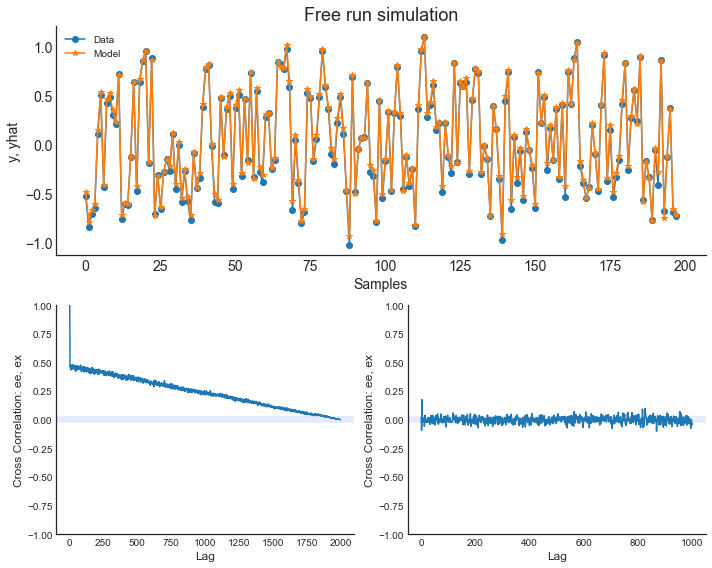

In [12]:
from sysidentpy.general_estimators import NARX

gb_narx = NARX(base_estimator=GradientBoostingRegressor(loss='quantile', alpha=0.90,
                                n_estimators=250, max_depth=10,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9),
              xlag=2,
              ylag=2
)

gb_narx.fit(x_train, y_train)
yhat = gb_narx.predict(x_valid, y_valid)
print(mean_squared_error(y_valid, yhat))

ee, ex, extras, lam = gb_narx.residuals(x_valid, y_valid, yhat)
gb_narx.plot_result(y_valid, yhat, ee, ex, n=200)

### NARX with ARD

10-14 20:31:27 - INFO - Training the model
10-14 20:31:27 - INFO - Creating the regressor matrix
10-14 20:31:27 - INFO - The regressor matrix have 5 features
10-14 20:31:27 - INFO - Done! Model is built!


c:\Users\wilso\Desktop\projects\GitHub\sysidentpy\sysidentpy\utils\deprecation.py:27: FutureWarning: Function __init__ has been deprecated since v0.1.7.
 Use NARXNN(ylag=2, xlag=2, basis_function='Some basis function') instead.This module was deprecated in favor of NARXNN(ylag=2, xlag=2, basis_function='Some basis function') module into which all the refactored classes and functions are moved.
 This feature will be removed in version v0.2.0.
  warnings.warn(message, FutureWarning)
C:\Users\wilso\miniconda3\envs\rd\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.0010850265047255031


c:\Users\wilso\Desktop\projects\GitHub\sysidentpy\sysidentpy\utils\deprecation.py:27: FutureWarning: Function residuals has been deprecated since v0.1.7.
 Use from sysidentpy.residues_correlation import compute_cross_correlation, compute_residues_autocorrelation instead.This module was deprecated in favor of from sysidentpy.residues_correlation import compute_cross_correlation, compute_residues_autocorrelation module into which all the refactored classes and functions are moved.
 This feature will be removed in version v0.2.0.
  warnings.warn(message, FutureWarning)


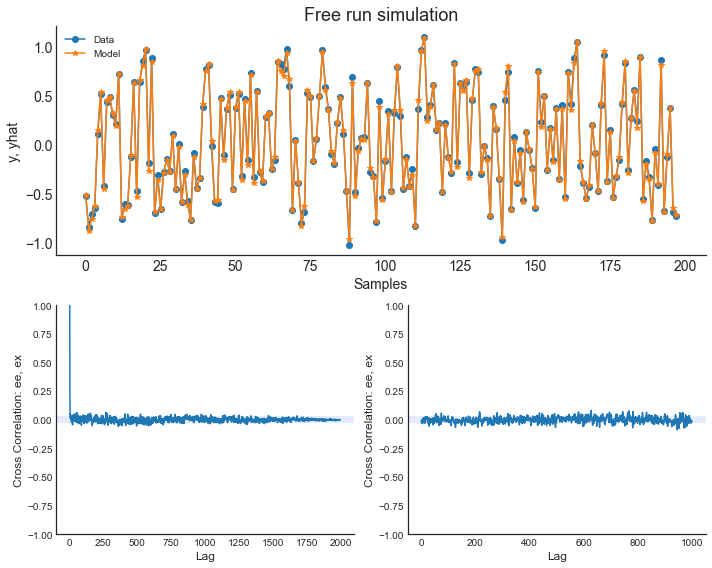

In [13]:
from sysidentpy.general_estimators import NARX

ARD_narx = NARX(base_estimator=ARDRegression(),
                xlag=2,
                ylag=2
)

ARD_narx.fit(x_train, y_train)
yhat = ARD_narx.predict(x_valid, y_valid)
print(mean_squared_error(y_valid, yhat))

ee, ex, extras, lam = ARD_narx.residuals(x_valid, y_valid, yhat)
ARD_narx.plot_result(y_valid, yhat, ee, ex, n=200)

### NARX with Bayesian Rigde

10-14 20:31:28 - INFO - Training the model
10-14 20:31:28 - INFO - Creating the regressor matrix
10-14 20:31:28 - INFO - The regressor matrix have 5 features
10-14 20:31:28 - INFO - Done! Model is built!


c:\Users\wilso\Desktop\projects\GitHub\sysidentpy\sysidentpy\utils\deprecation.py:27: FutureWarning: Function __init__ has been deprecated since v0.1.7.
 Use NARXNN(ylag=2, xlag=2, basis_function='Some basis function') instead.This module was deprecated in favor of NARXNN(ylag=2, xlag=2, basis_function='Some basis function') module into which all the refactored classes and functions are moved.
 This feature will be removed in version v0.2.0.
  warnings.warn(message, FutureWarning)
C:\Users\wilso\miniconda3\envs\rd\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.0010835020202762794


c:\Users\wilso\Desktop\projects\GitHub\sysidentpy\sysidentpy\utils\deprecation.py:27: FutureWarning: Function residuals has been deprecated since v0.1.7.
 Use from sysidentpy.residues_correlation import compute_cross_correlation, compute_residues_autocorrelation instead.This module was deprecated in favor of from sysidentpy.residues_correlation import compute_cross_correlation, compute_residues_autocorrelation module into which all the refactored classes and functions are moved.
 This feature will be removed in version v0.2.0.
  warnings.warn(message, FutureWarning)


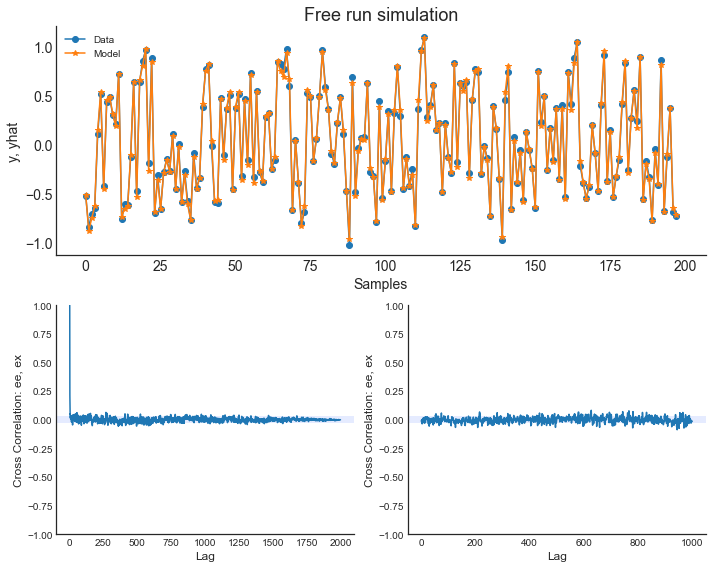

In [14]:
from sysidentpy.general_estimators import NARX

BayesianRidge_narx = NARX(base_estimator=BayesianRidge(),
                          xlag=2,
                          ylag=2
)

BayesianRidge_narx.fit(x_train, y_train)
yhat = BayesianRidge_narx.predict(x_valid, y_valid)
print(mean_squared_error(y_valid, yhat))

ee, ex, extras, lam = BayesianRidge_narx.residuals(x_valid, y_valid, yhat)
BayesianRidge_narx.plot_result(y_valid, yhat, ee, ex, n=200)